In [223]:
import config # .gitignore
import numpy as np
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=config.SPOTIPY_CLIENT_ID, client_secret=config.SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

happy_playlists = ['https://open.spotify.com/playlist/37i9dQZF1EIerWLYY5lG2u','https://open.spotify.com/playlist/37i9dQZF1EIcLfJYjuP7bx','https://open.spotify.com/playlist/37i9dQZF1EVJSvZp5AOML2','https://open.spotify.com/playlist/37i9dQZF1EIgG2NEOhqsD7','https://open.spotify.com/playlist/37i9dQZF1DXdPec7aLTmlC']
sad_playlists = ['https://open.spotify.com/playlist/37i9dQZF1EIdChYeHNDfK5','https://open.spotify.com/playlist/37i9dQZF1DWSqBruwoIXkA','https://open.spotify.com/playlist/37i9dQZF1EIg6gLNLe52Bd','https://open.spotify.com/playlist/37i9dQZF1DWW2hj3ZtMbuO','https://open.spotify.com/playlist/37i9dQZF1DWVV27DiNWxkR']
features = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']

def get_attributes(playlists, features):
    # get attributes of songs in playlist
    # playlist_link: list of spotify playlist links
    # features: list of features to get
    old = []
    for i in playlists:
        playlist_link = i
        playlist_URI = playlist_link.split("/")[-1].split("?")[0]
        track_uris = [x[ "track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]
        new = sp.audio_features(track_uris)
        new = [x for x in new if x is not None]
        old = old+new
        df = pd.DataFrame(old)[features]
    return df

happy = get_attributes(happy_playlists, features)
sad = get_attributes(sad_playlists, features)

happy['label'] = '1'
sad['label'] = '0'


In [224]:
merged = pd.concat([happy, sad])
training = merged.sample(frac=0.5, random_state=25)
testing = merged.drop(training.index)

X_train = training.drop('label', axis=1)
Y_train = training['label']
X_test = testing.drop('label', axis=1)
Y_test = testing['label']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)


In [225]:
accu = []
algr = ['lightGBM', 'XGBoost', 'Naive Bayes', 'LDA','Logistic Regression', 'KNN', 'SVM','Decision Tree','Random Forest','AdaBoost','SGD','Dummy']

In [226]:
# lightGBM decision tree
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)


In [227]:
# XGboost
import xgboost as xgb

clf0 = xgb.XGBClassifier()
clf0.fit(X_train, Y_train)
y_pred=clf0.predict(X_test)

# Accuracy
a = clf0.score(X_test, Y_test)
accu.append(a)


In [228]:
# Navie Bayes Classifier
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)

In [229]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)  

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)


In [230]:
# Logistic regression (LR)
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)


/Users/peiyangliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [231]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)

In [232]:
# SVM
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)


In [233]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)

In [234]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)


In [235]:
# Adaptive Boosting (AdaBoost)
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)

In [236]:
# SGD
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)


/Users/peiyangliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [237]:
# Rule-based classification
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy="most_frequent")
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)


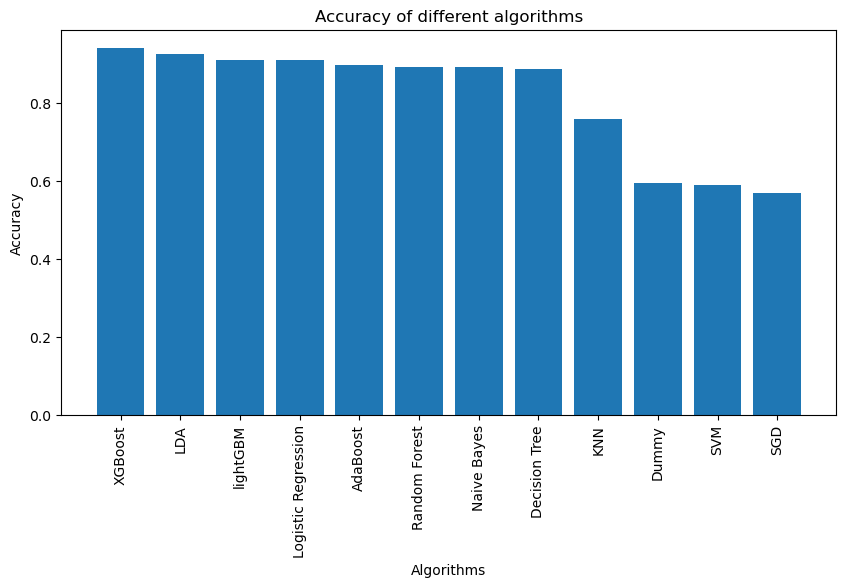

In [238]:
# plot in descending order
accu, algr = zip(*sorted(zip(accu, algr), reverse=True))
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(algr,accu)
plt.xticks(rotation=90)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of different algorithms')
plt.show()







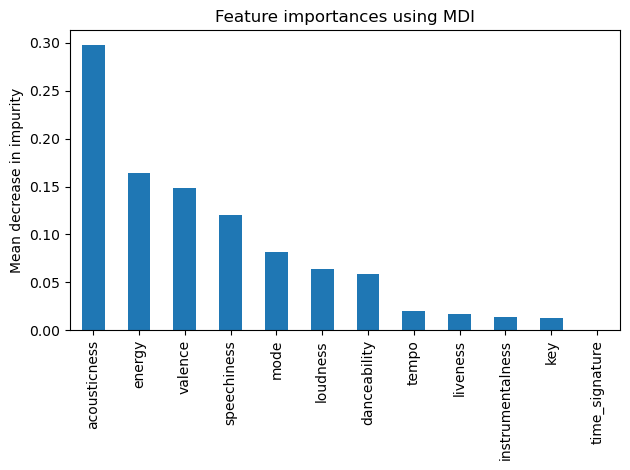

In [239]:
# feature importance
importance = clf0.feature_importances_

dt_importances = pd.Series(importance, index=X_train.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
dt_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
# https://link.springer.com/article/10.1007/s42979-021-00592-x